# 5. Model the Solution

### Preprocessing to get the tidy dataframe

In [52]:
# Import the library we need, which is dplyr and ggplot2
library(dplyr)
library(ggplot2)

In [53]:
options(repr.plot.width=10, repr.plot.height=6)

In [54]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df <- read.csv('MonthWiseMarketArrivals_Clean.csv')

In [55]:
str(df)

'data.frame':	10320 obs. of  10 variables:
 $ market  : Factor w/ 122 levels "ABOHAR(PB)","AGRA(UP)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month   : Factor w/ 12 levels "April","August",..: 5 5 5 5 5 5 5 5 4 4 ...
 $ year    : int  2005 2006 2010 2011 2012 2013 2014 2015 2005 2006 ...
 $ quantity: int  2350 900 790 245 1035 675 440 1305 1400 1800 ...
 $ priceMin: int  404 487 1283 3067 523 1327 1025 1309 286 343 ...
 $ priceMax: int  493 638 1592 3750 686 1900 1481 1858 365 411 ...
 $ priceMod: int  446 563 1460 3433 605 1605 1256 1613 324 380 ...
 $ city    : Factor w/ 119 levels "ABOHAR","AGRA",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state   : Factor w/ 22 levels "AP","ASM","BHR",..: 17 17 17 17 17 17 17 17 17 17 ...
 $ date    : Factor w/ 243 levels "1996-01-01","1996-02-01",..: 109 121 169 181 193 205 217 229 110 122 ...


In [56]:
# Fix the date
df$date = as.Date(as.character(df$date), "%Y-%m-%d")

In [57]:
head(df)

,market,month,year,quantity,priceMin,priceMax,priceMod,city,state,date
1,ABOHAR(PB),January,2005,2350,404,493,446,ABOHAR,PB,2005-01-01
2,ABOHAR(PB),January,2006,900,487,638,563,ABOHAR,PB,2006-01-01
3,ABOHAR(PB),January,2010,790,1283,1592,1460,ABOHAR,PB,2010-01-01
4,ABOHAR(PB),January,2011,245,3067,3750,3433,ABOHAR,PB,2011-01-01
5,ABOHAR(PB),January,2012,1035,523,686,605,ABOHAR,PB,2012-01-01
6,ABOHAR(PB),January,2013,675,1327,1900,1605,ABOHAR,PB,2013-01-01


In [58]:
# Get the values for Bangalore
dfBang <- df %>%
          filter( city == 'BANGALORE') %>%
          arrange(date) %>%
          select(quantity, priceMod, date)

In [59]:
head(dfBang)

,quantity,priceMod,date
1,227832,991,2004-01-01
2,225133,793,2004-02-01
3,221952,556,2004-03-01
4,185150,465,2004-04-01
5,137390,455,2004-05-01
6,311445,551,2004-06-01


## Question 3: How is Price and Quantity related for Onion in Bangalore?

In [60]:
summary(dfBang$priceMod)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    320     551     828    1041    1323    3430 

In [61]:
summary(dfBang$quantity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  63820  329800  405700  523600  660700 1639000 

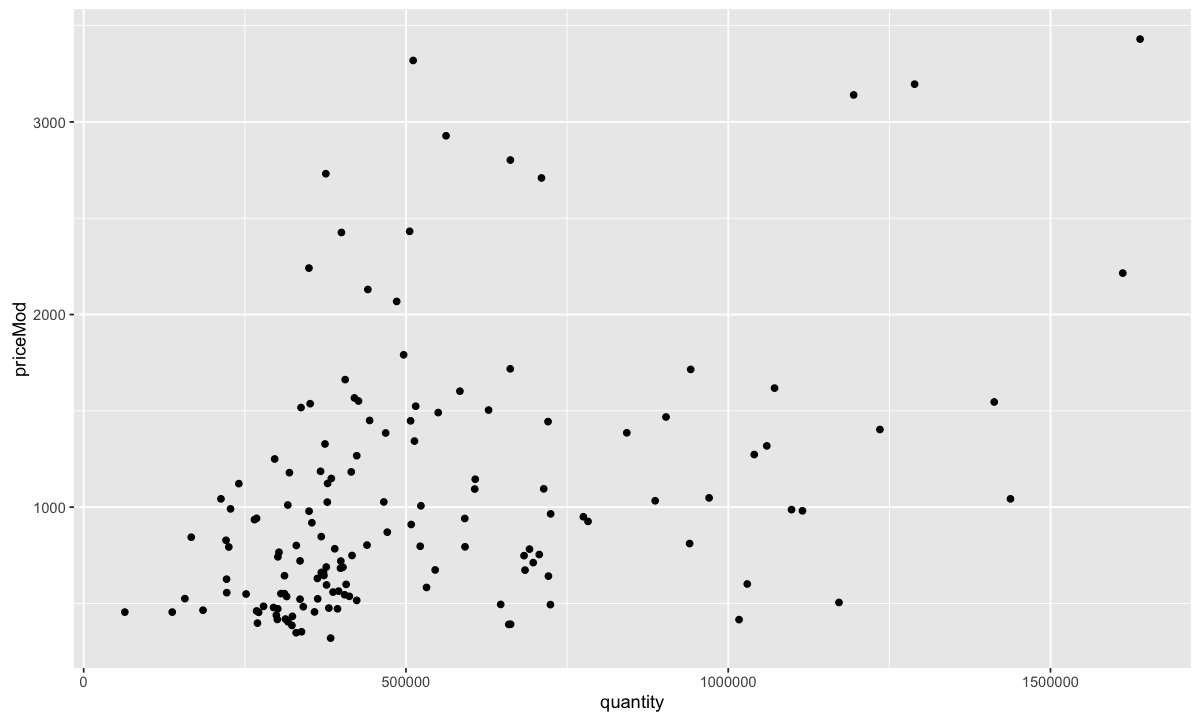

In [62]:
ggplot(dfBang) + aes(quantity, priceMod) + geom_point()

## PRINCIPLE: Correlation

Correlation refers to any of a broad class of statistical relationships involving dependence, though in common usage it most often refers to the extent to which two variables have a linear relationship with each other.

![](../img/corr.svg)

In [63]:
cor(df$quantity, df$priceMod)

[1] -0.05684725

In [64]:
cor(log(df$quantity), log(df$priceMod))

[1] -0.09139473

## PRINCIPLE: Visualizing linear relationships

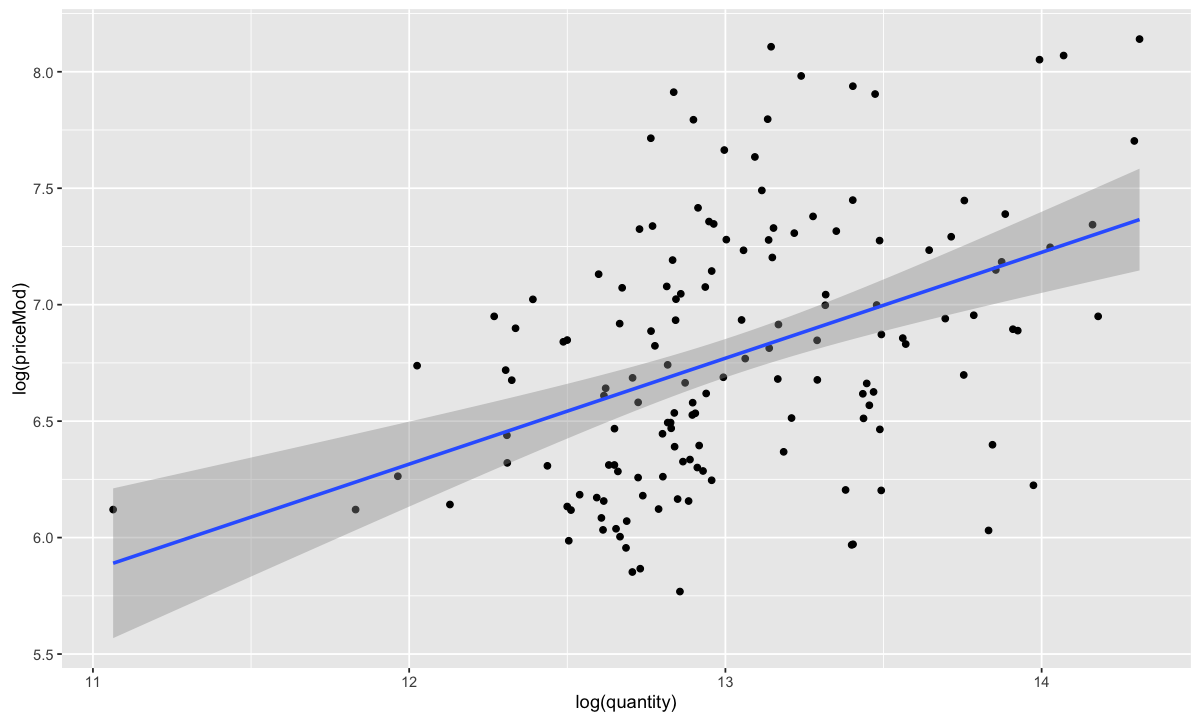

In [65]:
# We can try and fit a linear line to the data to see if there is a relationship
ggplot(dfBang) + aes(log(quantity), log(priceMod)) + geom_point() + stat_smooth(method = 'lm')

### Exercise: Calculate the price and quantity relationship in Lasalgaon

## Question 4: Can we forecast the price of Onion in Bangalore?

## TIme Series Modelling

We will build a time-series forecasting model to get a forecast for Onion prices. 

Most of the time series models work on the assumption that the time series is stationary. Intuitively, we can see that if a time series has a particular behaviour over time, there is a very high probability that it will follow the same in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series

**Statistical stationarity**: A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. A stationarized series is relatively easy to predict: you simply predict that its statistical properties will be the same in the future as they have been in the past! 

There are three basic criterion for a series to be classified as stationary series :

- The mean of the series should not be a function of time rather should be a constant. 

![](img/Mean_nonstationary.png)

- The variance of the series should not a be a function of time. This property is known as homoscedasticity.

![](img/Var_nonstationary.png)

- The covariance of the i th term and the (i + m) th term should not be a function of time. This property is called auto-correlation

![](img/Cov_nonstationary.png)


In [66]:
head(dfBang)

,quantity,priceMod,date
1,227832,991,2004-01-01
2,225133,793,2004-02-01
3,221952,556,2004-03-01
4,185150,465,2004-04-01
5,137390,455,2004-05-01
6,311445,551,2004-06-01


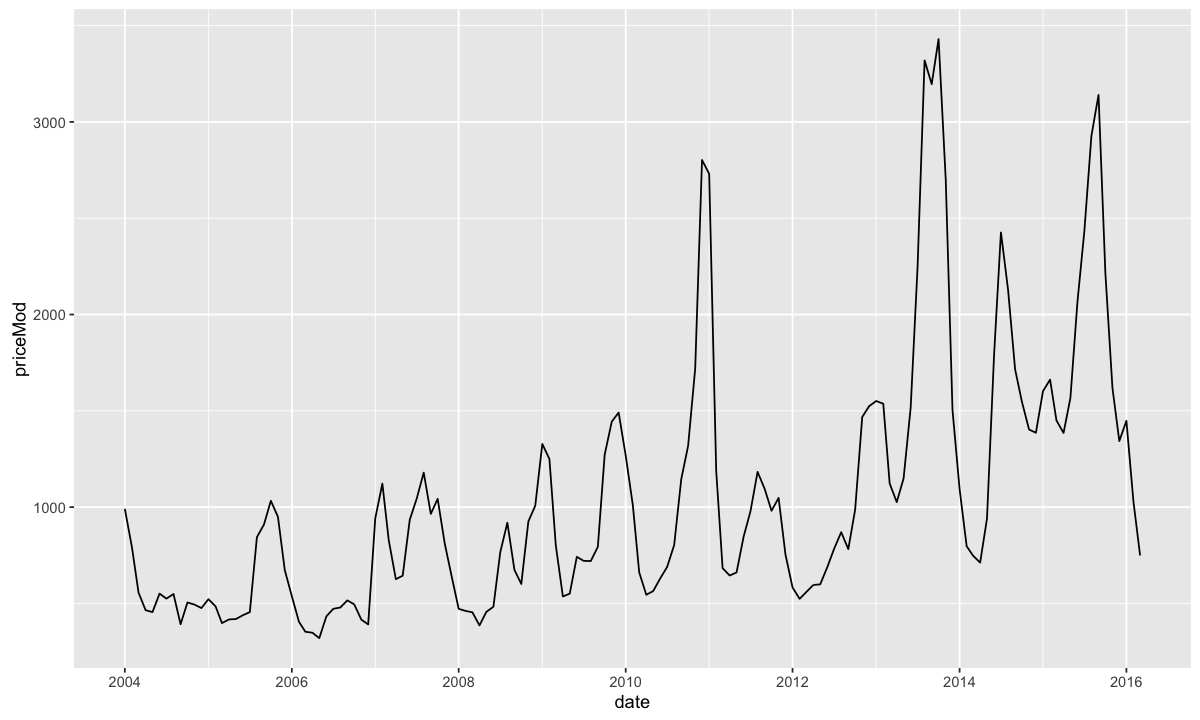

In [67]:
# Let us create a time series variable for priceMod
ggplot(dfBang) + aes(date, priceMod) + geom_line()

Approaches to make the time series stationary

1. Transformation - Take a log, sqrt, cuberoot etc. transformation
2. Aggregation – taking average for a time period like monthly/weekly averages
3. Smoothing – taking rolling averages, exponential smoothing
4. Differencing - Take the first-order or second-order difference to stablize the mean

## PRINCIPLE: Transformation

In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x. In a stronger sense, a transformation is a replacement that changes the shape of a distribution or relationship. Transformation are done for...

1. Convenience
2. Reducing skewness
3. Equal spreads
4. Linear relationships
5. Additive relationships

In [68]:
dfBang <- dfBang %>%
          mutate(priceModLog = log(priceMod))

In [69]:
head(dfBang)

,quantity,priceMod,date,priceModLog
1,227832,991,2004-01-01,6.898715
2,225133,793,2004-02-01,6.675823
3,221952,556,2004-03-01,6.320768
4,185150,465,2004-04-01,6.142037
5,137390,455,2004-05-01,6.120297
6,311445,551,2004-06-01,6.311735


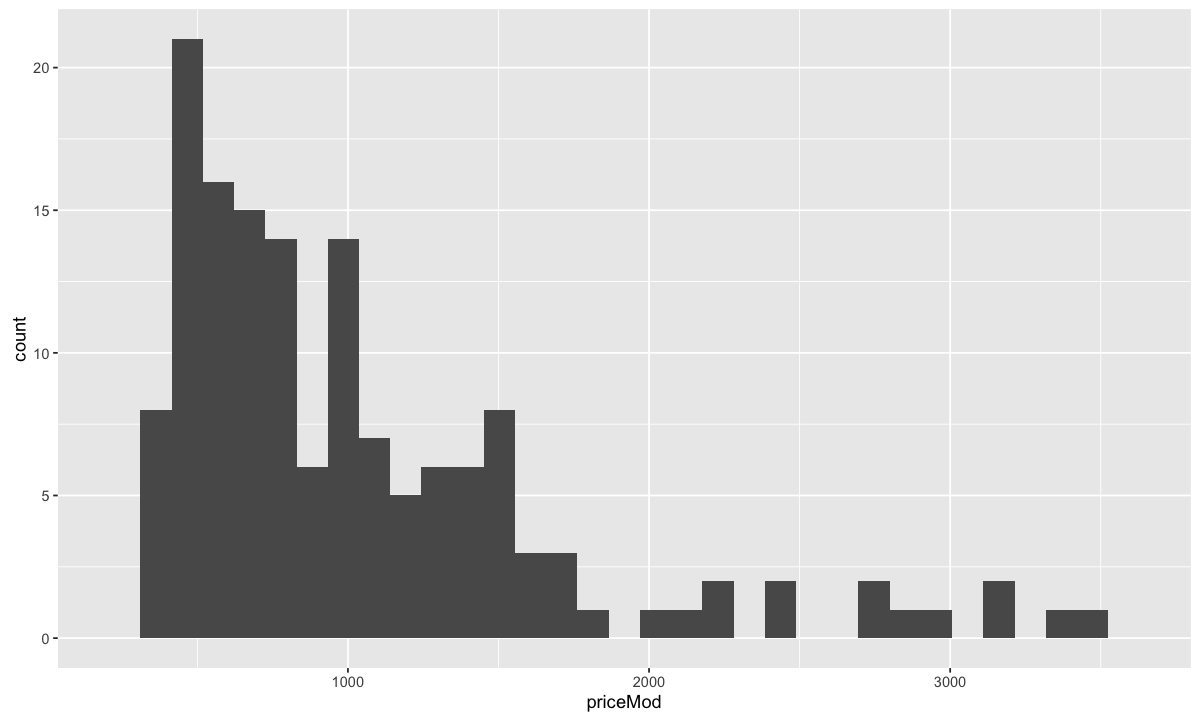

In [70]:
ggplot(dfBang) + aes(priceMod) + geom_histogram(bins  = 30)

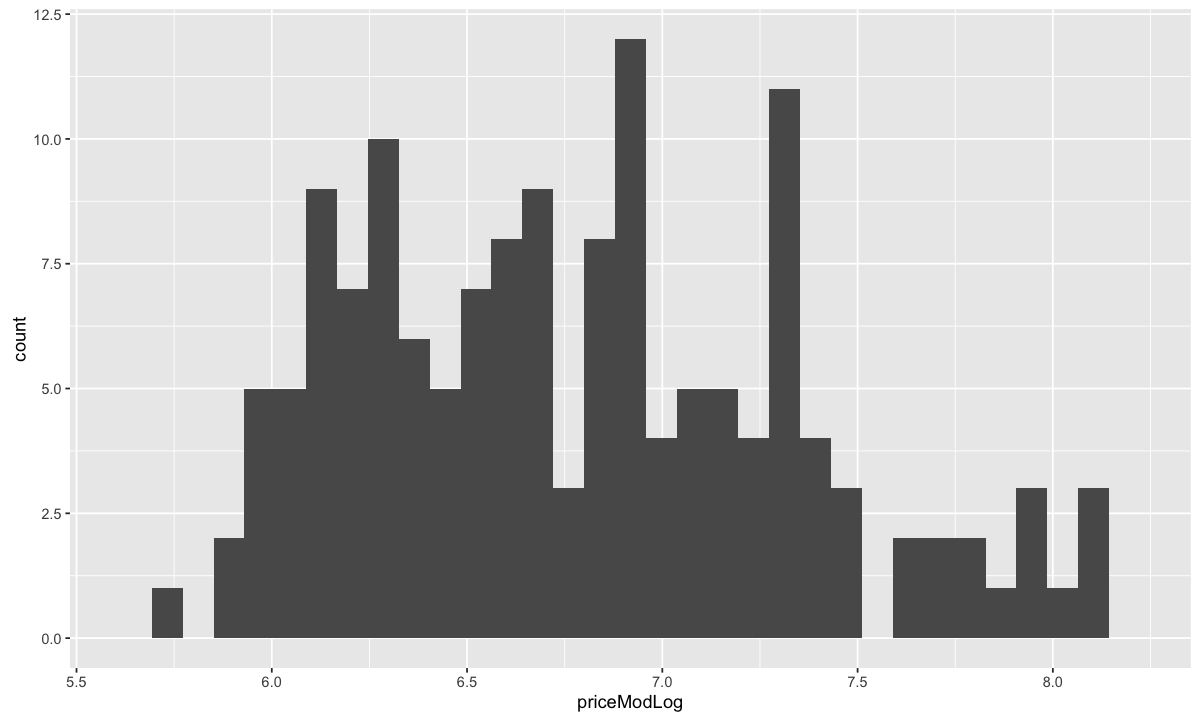

In [71]:
ggplot(dfBang) + aes(priceModLog) + geom_histogram(bins = 30)

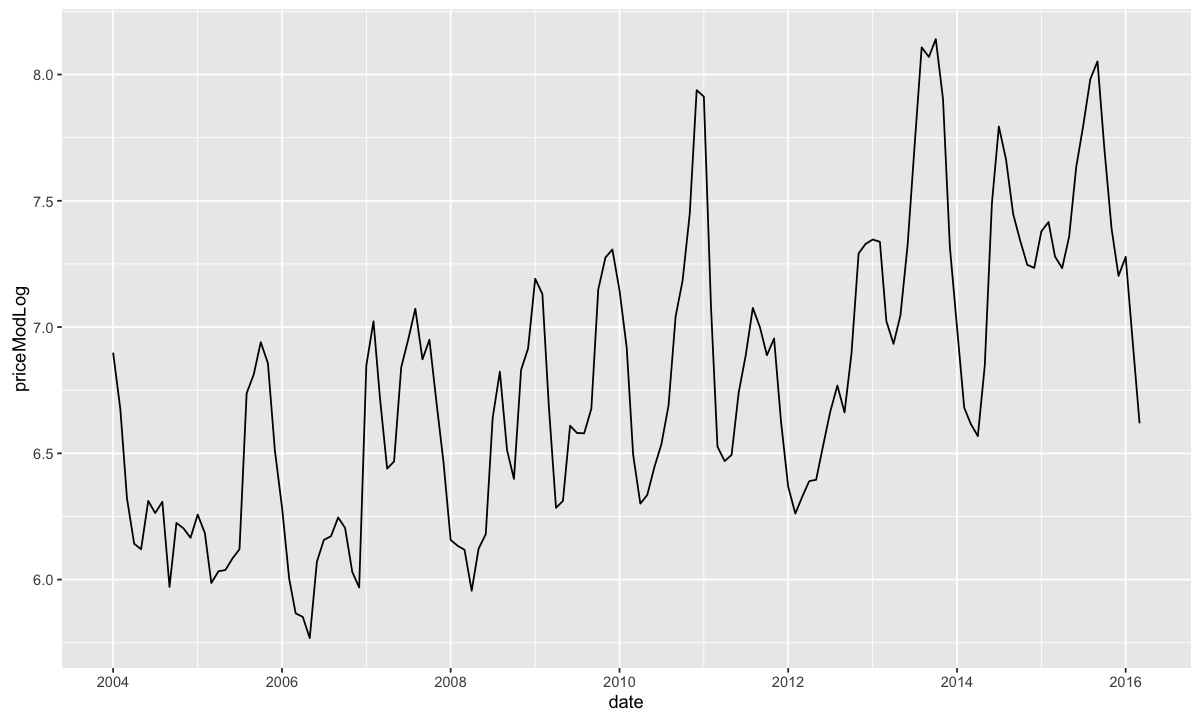

In [72]:
# We take the log transform to reduce the impact of high values
ggplot(dfBang) + aes(date, priceModLog) + geom_line()

## PRINCIPLE: Differencing

Computing the differences between consecutive observations is known as differencing.

Transformations such as logarithms can help to stabilize the variance of a time series. Differencing can help stabilize the mean of a time series by removing changes in the level of a time series, and so eliminating trend and seasonality.

## PRINCIPLE: Window functions in dplyr

A window function is a variation on an aggregation function. Where an aggregation function, like `sum()` and `mean()`, takes n inputs and return a single value, a window function returns n values. The output of a window function depends on all its input values. Window functions include variations on aggregate functions, like `cumsum()` and `cummean()`, functions for ranking and ordering, like `rank()`, and functions for taking offsets, like `lead()` and `lag()`.

In [73]:
# Let us take the first order difference
dfBang <- dfBang %>%
          mutate(priceModLogLag = lag(priceModLog)) %>%
          mutate(priceModLogDiff = priceModLog - lag(priceModLog) )

In [74]:
# The first value is NA, the rest are first order differences
head(dfBang)

,quantity,priceMod,date,priceModLog,priceModLogLag,priceModLogDiff
1,227832,991,2004-01-01,6.898715,NA,NA
2,225133,793,2004-02-01,6.675823,6.898715,-0.2228913
3,221952,556,2004-03-01,6.320768,6.675823,-0.3550549
4,185150,465,2004-04-01,6.142037,6.320768,-0.1787309
5,137390,455,2004-05-01,6.120297,6.142037,-0.02173999
6,311445,551,2004-06-01,6.311735,6.120297,0.1914374


In [75]:
# We can see that they are highly correlated
cor(dfBang$priceModLog, dfBang$priceModLogLag, use = 'complete')

[1] 0.9010564

Warning message:
: Removed 1 rows containing missing values (geom_point).

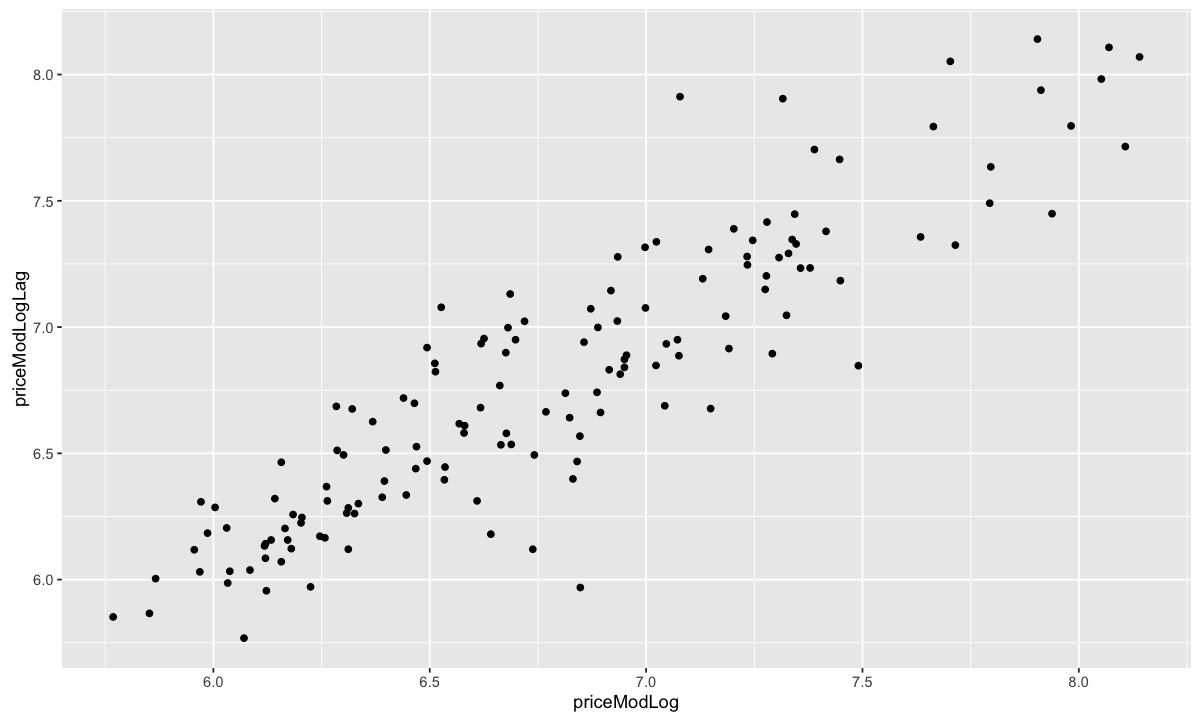

In [76]:
ggplot(dfBang) + aes(priceModLog, priceModLogLag) + geom_point()

Warning message:
: Removed 1 rows containing missing values (geom_path).

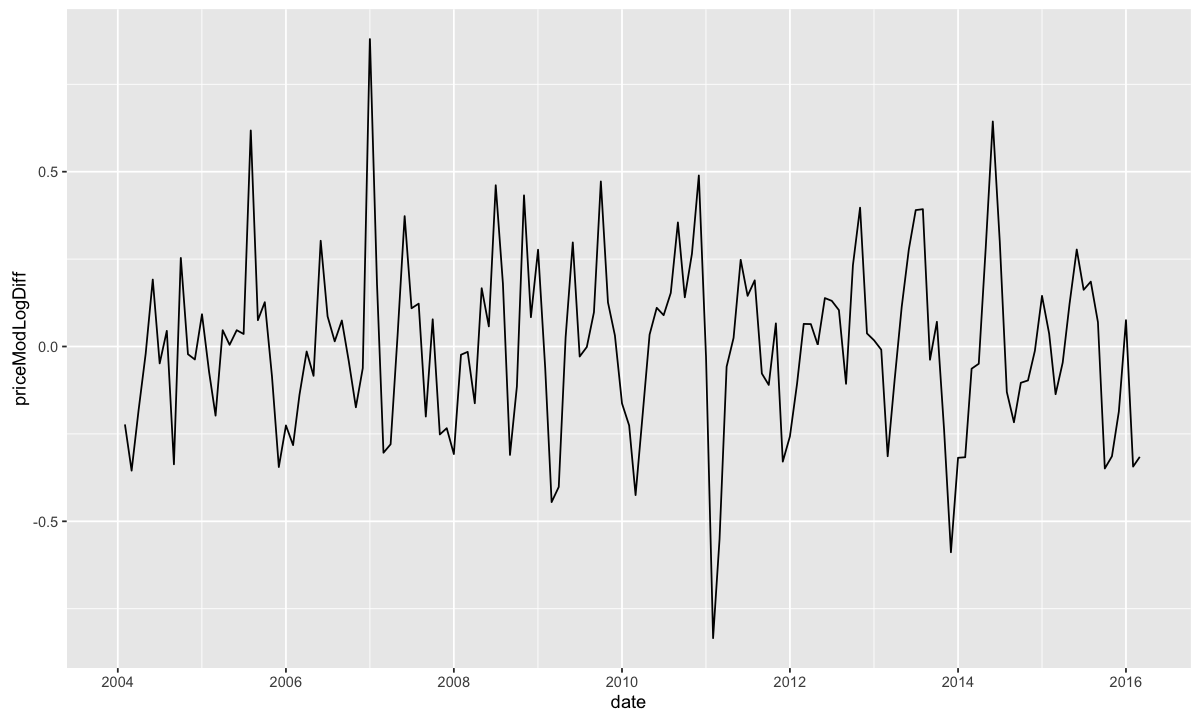

In [77]:
# Let us plot the priceModLogDiff
ggplot(dfBang) + aes(date, priceModLogDiff) + geom_line()

In [78]:
# We can check the mean of this difference has been reduced close to zero
mean(dfBang$priceModLogDiff, na.rm = TRUE)

[1] -0.001917641

In [79]:
sd(dfBang$priceModLogDiff, na.rm = TRUE)

[1] 0.2487719

Now it is cumbersome to calculate the correlation for t-1, t-2, t-3 and so on to check... So we can use the `acf` function to do the same.

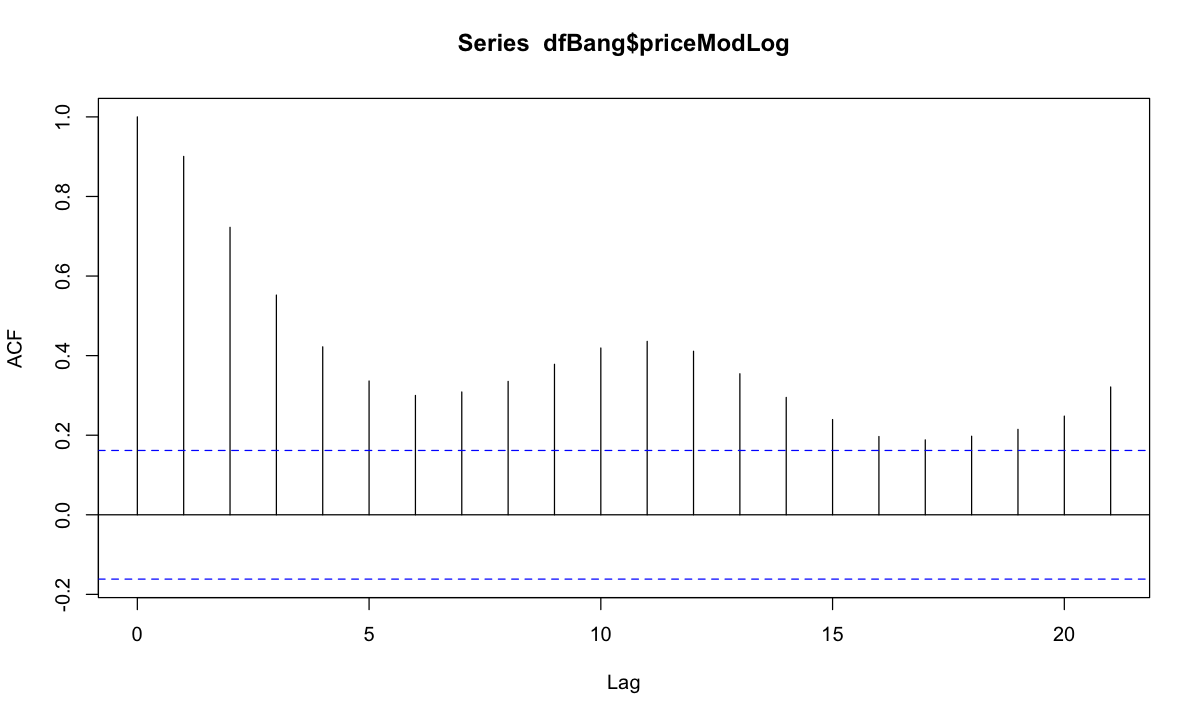

In [80]:
# Calculate the auto-correlation for the priceModLog
acf(dfBang$priceModLog, na.action = na.omit)

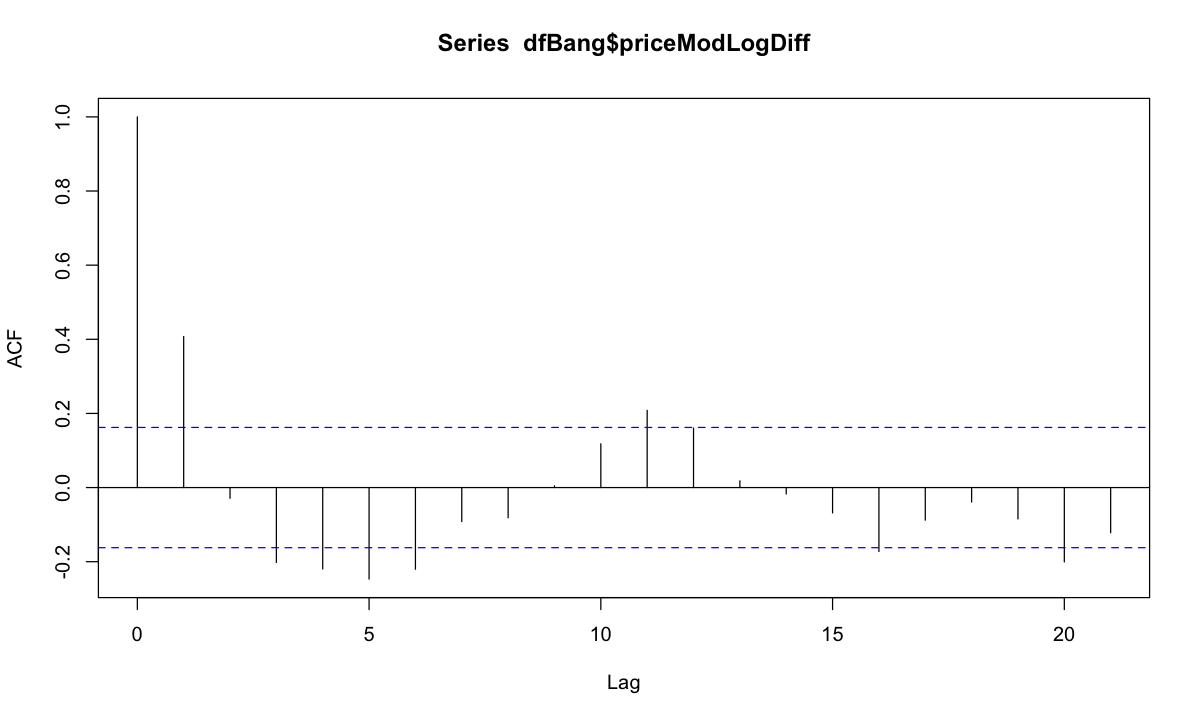

In [81]:
# Calculate the auto correlation factor for priceModLogDiff
acf(dfBang$priceModLogDiff, na.action = na.omit)

In [92]:
dim(dfBang)

[1] 147   7

In [94]:
# Confidence Interval
2 / sqrt(147)

[1] 0.1649572

## Random Walk Model

When faced with a time series that shows irregular growth, the best strategy may not be to try to directly predict the level of the series at each period (i.e., the quantity Yt). Instead, it may be better to try to predict the change that occurs from one period to the next (i.e., the quantity Yt - Yt-1). That is, it may be better to look at the first difference of the series, to see if a predictable pattern can be found there. For purposes of one-period-ahead forecasting, it is just as good to predict the next change as to predict the next level of the series, since the predicted change can be added to the current level to yield a predicted level. The simplest case of such a model is one that always predicts that the next change will be zero, as if the series is equally likely to go up or down in the next period regardless of what it has done in the past.


**Random Walk Model** $$ \hat{Y_t} = Y_{t-1} + \epsilon \\$$

In [82]:
head(dfBang)

,quantity,priceMod,date,priceModLog,priceModLogLag,priceModLogDiff
1,227832,991,2004-01-01,6.898715,NA,NA
2,225133,793,2004-02-01,6.675823,6.898715,-0.2228913
3,221952,556,2004-03-01,6.320768,6.675823,-0.3550549
4,185150,465,2004-04-01,6.142037,6.320768,-0.1787309
5,137390,455,2004-05-01,6.120297,6.142037,-0.02173999
6,311445,551,2004-06-01,6.311735,6.120297,0.1914374


In [85]:
dfBang <- dfBang %>%
          mutate(priceRandomWalk = lag(priceMod))

In [86]:
head(dfBang)

,quantity,priceMod,date,priceModLog,priceModLogLag,priceModLogDiff,priceRandomWalk
1,227832,991,2004-01-01,6.898715,NA,NA,NA
2,225133,793,2004-02-01,6.675823,6.898715,-0.2228913,991
3,221952,556,2004-03-01,6.320768,6.675823,-0.3550549,793
4,185150,465,2004-04-01,6.142037,6.320768,-0.1787309,556
5,137390,455,2004-05-01,6.120297,6.142037,-0.02173999,465
6,311445,551,2004-06-01,6.311735,6.120297,0.1914374,455


In [99]:
tail(dfBang)

,quantity,priceMod,date,priceModLog,priceModLogLag,priceModLogDiff,priceRandomWalk
142,1612160,2215,2015-10-01,7.703008,8.051978,-0.3489704,3140
143,1071872,1618,2015-11-01,7.388946,7.703008,-0.3140616,2215
144,513186,1343,2015-12-01,7.202661,7.388946,-0.1862849,1618
145,507223,1448,2016-01-01,7.277939,7.202661,0.07527738,1343
146,465640,1027,2016-02-01,6.934397,7.277939,-0.3435414,1448
147,416316,749,2016-03-01,6.618739,6.934397,-0.3156582,1027


In [97]:
predicted <- tail(dfBang$priceMod, 1)

In [98]:
predicted

[1] 749

Warning message:
: Removed 1 rows containing missing values (geom_path).

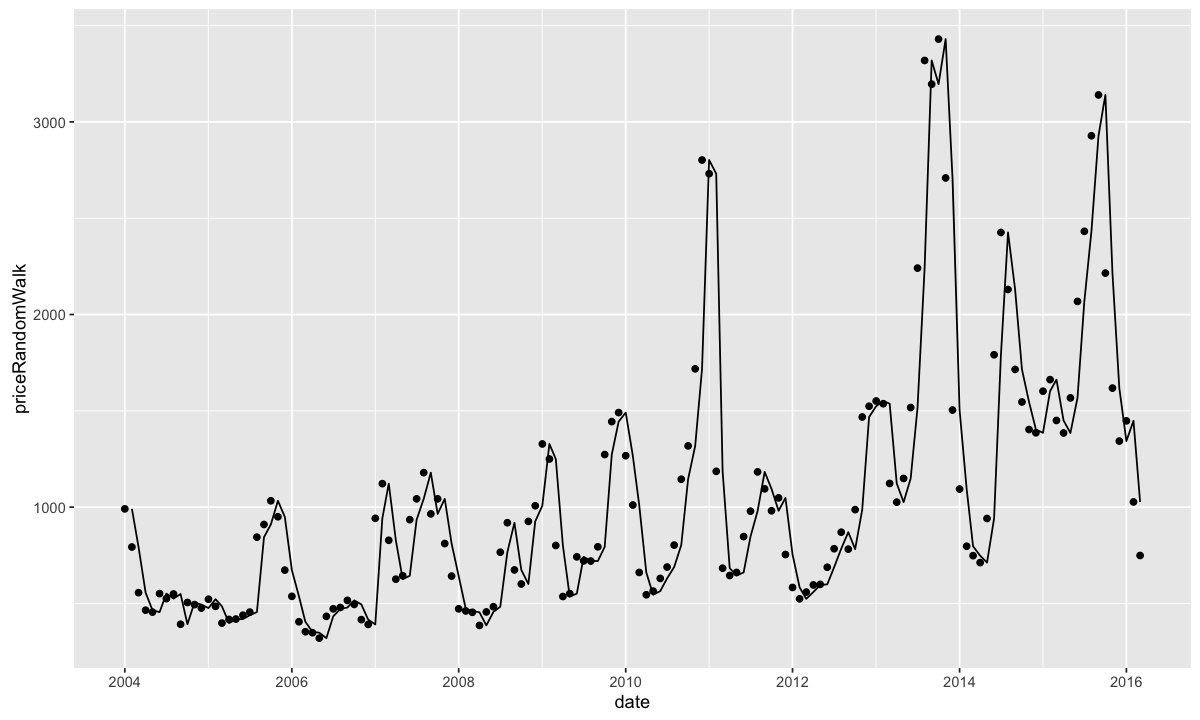

In [91]:
ggplot(dfBang) + aes(date, priceRandomWalk) + geom_line() + geom_point(aes(date, priceMod))

### Exercise: Calculate the `acf` for first order difference of priceMod for Lasalgaon